# Statistique descriptive 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

In [2]:
df_GrandEst = pd.read_csv('S:/Desktop/Python/data_GrandEst.csv')

In [ ]:
#Des données sans département. Nous mettons des lignes NA pour ne pas avoir d'erreur par la suite
df_GrandEst['departement nb'] = df_GrandEst['departement nb'].fillna('NA')
#Colonne en trop
df_GrandEst = df_GrandEst.drop('Unnamed: 0.1', axis=1)

In [13]:
#Grand est dans département = pas d'information
df_GrandEst = df_GrandEst.replace({'departement': {'Grand Est': 'Aucune information sur le département'}})

## Information globale

In [107]:
Stats_GrandEst = df_GrandEst.describe(include='all')
Stats_GrandEst

,titre,type,reference,departement,date,lien,code,Categorie
count,4206,4206,4206,4206,4206,4206,4206,4206
unique,3763,3,4206,11,411,4206,11,4
top,INFIRMIER (ERE) H/F,Fonction publique de l'État,MINT_057ATK0003-77635,Moselle (57),2024-01-18,https://choisirleservicepublic.gouv.fr/offre-e...,57,C
freq,20,1569,1,728,123,1,728,1483


In [14]:
nb_offre_dep = df_GrandEst['departement'].value_counts()

In [15]:
nb_offre_dep = nb_offre_dep.sort_values()

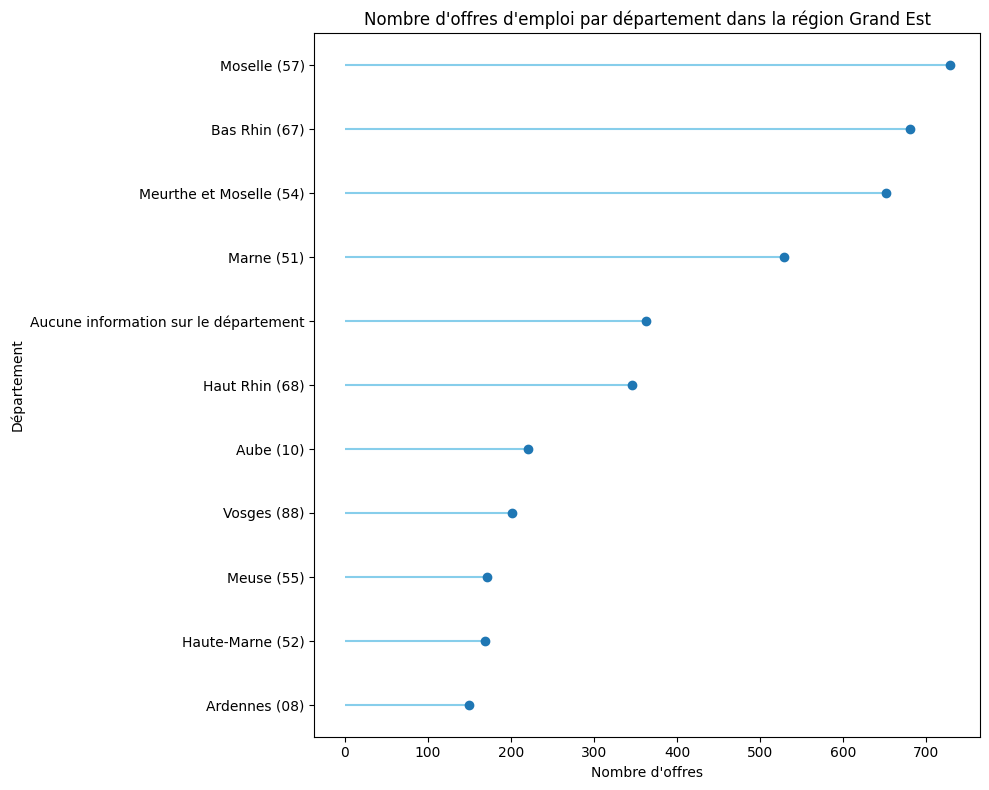

In [17]:
plt.figure(figsize=(10, 8))
plt.hlines(y=nb_offre_dep.index, xmin=0, xmax=nb_offre_dep, color='skyblue')
plt.plot(nb_offre_dep, nb_offre_dep.index, "o")
plt.title('Nombre d\'offres d\'emploi par département dans la région Grand Est')
plt.xlabel('Nombre d\'offres')
plt.ylabel('Département')
plt.tight_layout()

## Visualisation géographique

Nous utilisons le projet de l'IGN contenant les tracés des entités géographiques et administratives françaises au format GeoJSON avec la bibliothéque geopandas

In [68]:
geo_GrandEst = gpd.read_file("https://github.com/gregoiredavid/france-geojson/raw/master/departements.geojson")
print(geo_GrandEst.columns)

In [60]:
#On renomme pour bien fusionner avec les données géographiques de l'IGN
df_GrandEst = df_GrandEst.rename(columns={'departement nb': 'code'})
df_GrandEst['code'] = df_GrandEst['code'].astype(str)

In [82]:
offre_dep = df_GrandEst['code'].value_counts()
offre_dep

In [84]:
geo_GrandEst = geo_GrandEst.merge(offre_dep, left_on='code', right_index=True, how='left')
geo_GrandEst

,code,nom,geometry,count
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",NaN
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...",NaN
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...",NaN
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...",NaN
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...",NaN
...,...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ...",NaN
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ...",NaN
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ...",NaN
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ...",NaN


In [85]:
geo_GrandEst['count'] = geo_GrandEst['count'].fillna(0)

<Axes: >

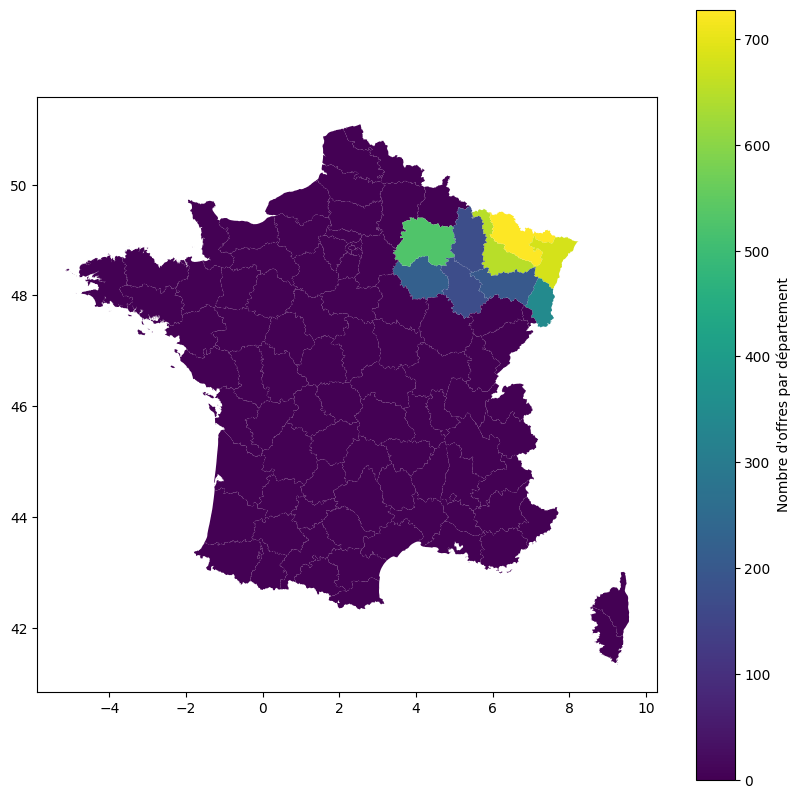

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_GrandEst.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Nombre d'offres par département", 'orientation': "vertical"})

In [ ]:
# Maintenant que la région Grand Est
codes_grand_est = ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']
geo_GrandEst = geo_GrandEst[geo_GrandEst['code'].isin(codes_grand_est)]

<Axes: >

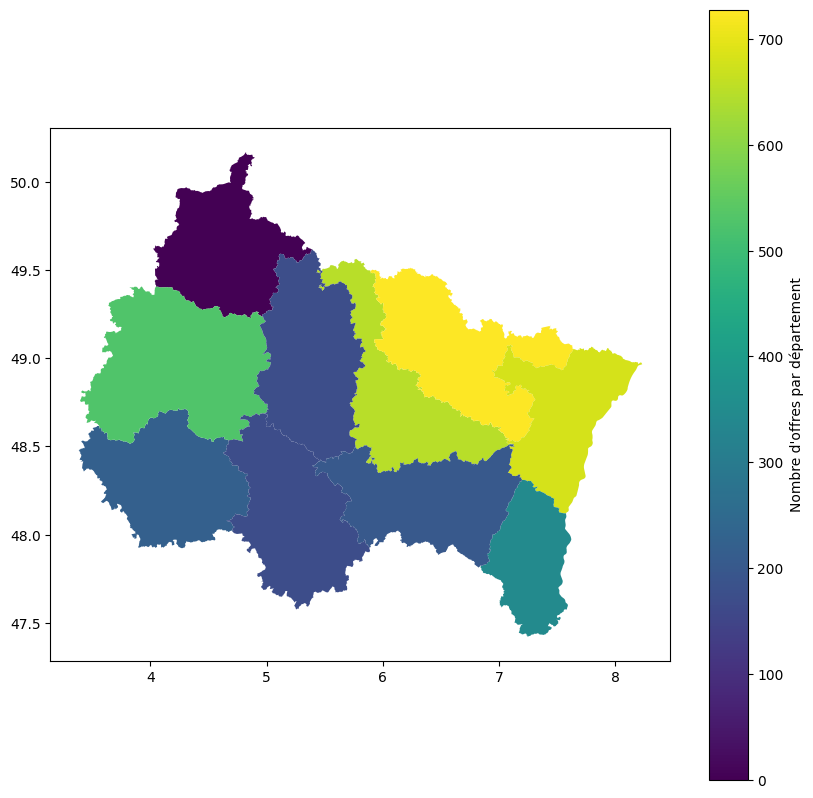

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_GrandEst.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Nombre d'offres par département", 'orientation': "vertical"})

Les spécialistes en géographie et aménagement du territoire ont identifié, dès l'entame des "Trente Glorieuses", des déséquilibres significatifs dans le développement spatial français. L'ouvrage de Jean-François Gravier, "Paris et le désert français", paru en 1947, en est un exemple éloquent. Gravier y dépeint la France comme étant fortement centralisée autour de Paris, entraînant diverses répercussions. Premièrement, une macrocéphalie parisienne se manifeste, avec une concentration notable des secteurs économique et universitaire dans la capitale. En outre, un réseau de communication en étoile émerge, avec Paris en son centre. Face à ce constat, l'État français a initié plusieurs politiques correctives. En 1963, le rapport de Hautreux et Rochefort conduit la DATAR à identifier huit métropoles ou réseaux de villes, désignés dès 1964 comme "métropoles d'équilibre". Ces villes, comprenant Lille-Roubaix-Tourcoing, Nancy-Metz, Strasbourg, Lyon-Grenoble-Saint-Etienne, Marseille, Toulouse, Bordeaux, Nantes-Saint-Nazaire, et par la suite Rennes, Clermont-Ferrand, Dijon, Nice, ont bénéficié d'une politique volontariste visant à contrebalancer l'influence parisienne et à stimuler un développement régional plus autonome et harmonieux, notamment à travers des investissements publics accrus et la mise en place d'infrastructures spécifiques. Ainsi, dans ce cas, nous observons bien une concentration au travers de métropoles d'équilibre du Grand-Est

In [135]:
#Nombre d'offre
cat_count = df_GrandEst.groupby(['departement', 'Categorie']).size().unstack(fill_value=0)
type_count = df_GrandEst.groupby(['departement', 'type']).size().unstack(fill_value=0)

In [141]:
cat_count

Categorie,A,A+,B,C
departement,,,,
Ardennes (08),63,5,39,43
Aube (10),76,3,56,85
Aucune information sur le département,89,56,52,165
Bas Rhin (67),250,30,176,224
Haut Rhin (68),111,10,93,132
Haute-Marne (52),72,8,43,46
Marne (51),187,14,130,197
Meurthe et Moselle (54),271,38,157,185
Meuse (55),63,7,54,47


In [143]:
type_count

type,Fonction publique Hospitalière,Fonction publique Territoriale,Fonction publique de l'État
departement,,,
Ardennes (08),30,77,43
Aube (10),22,113,85
Aucune information sur le département,337,0,25
Bas Rhin (67),51,315,314
Haut Rhin (68),72,213,61
Haute-Marne (52),52,59,58
Marne (51),105,144,279
Meurthe et Moselle (54),164,195,292
Meuse (55),48,87,36


Nous pouvons observer que ce sont principalement les offres de la fonction publique Hospitalière ou nous avons peu d'information

In [136]:
#La part pour chaque offre
cat_dep = cat_count.div(cat_count.sum(axis=1), axis=0)
type_dep = type_count.div(type_count.sum(axis=1), axis=0)

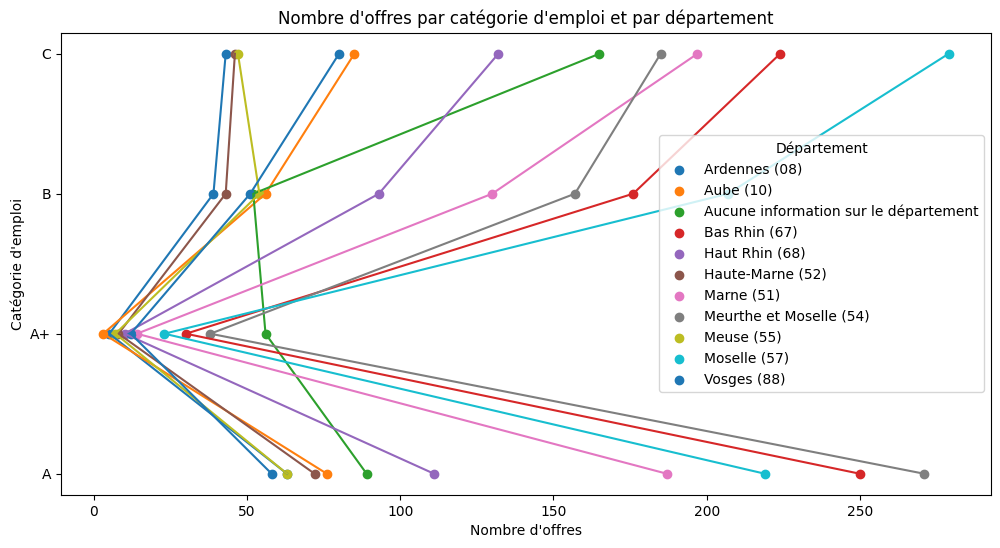

In [138]:
plt.figure(figsize=(12, 6))
for cat in cat_count.index:
    cat_data = cat_count.loc[cat]
    plt.scatter(cat_data.values, cat_data.index, label=cat)
    plt.plot(cat_data.values, cat_data.index)

plt.title('Nombre d\'offres par catégorie d\'emploi et par département')
plt.xlabel('Nombre d\'offres')
plt.ylabel('Catégorie d\'emploi')
plt.legend(title='Département')
plt.show()

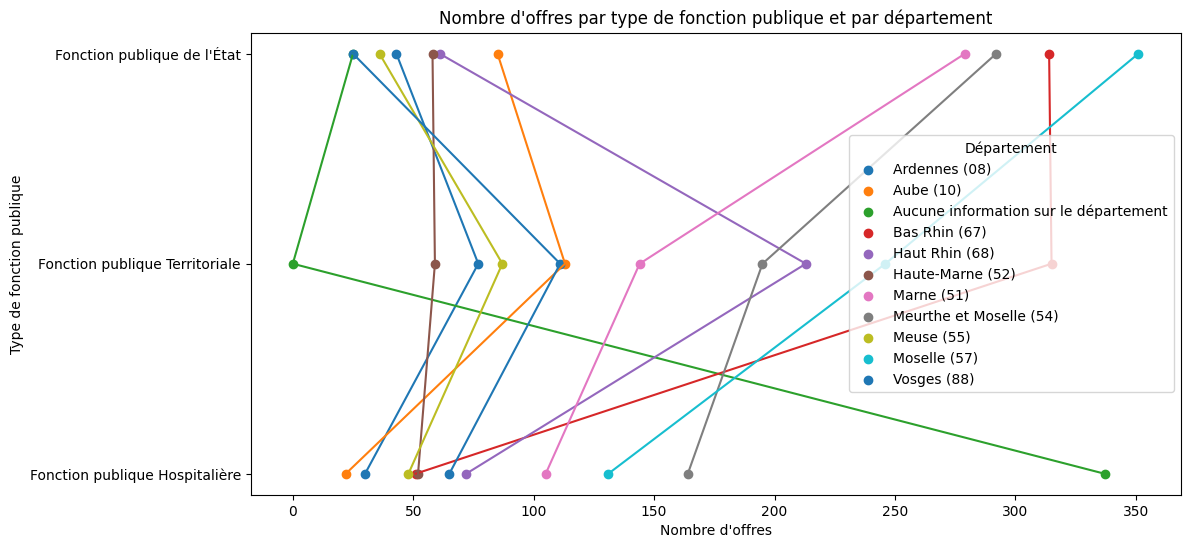

In [139]:
plt.figure(figsize=(12, 6))
for type in type_count.index:
    type_data = type_count.loc[type]
    plt.scatter(type_data.values, type_data.index, label=type)
    plt.plot(type_data.values, type_data.index)

plt.title('Nombre d\'offres par type de fonction publique et par département')
plt.xlabel('Nombre d\'offres')
plt.ylabel('Type de fonction publique')
plt.legend(title='Département')
plt.show()

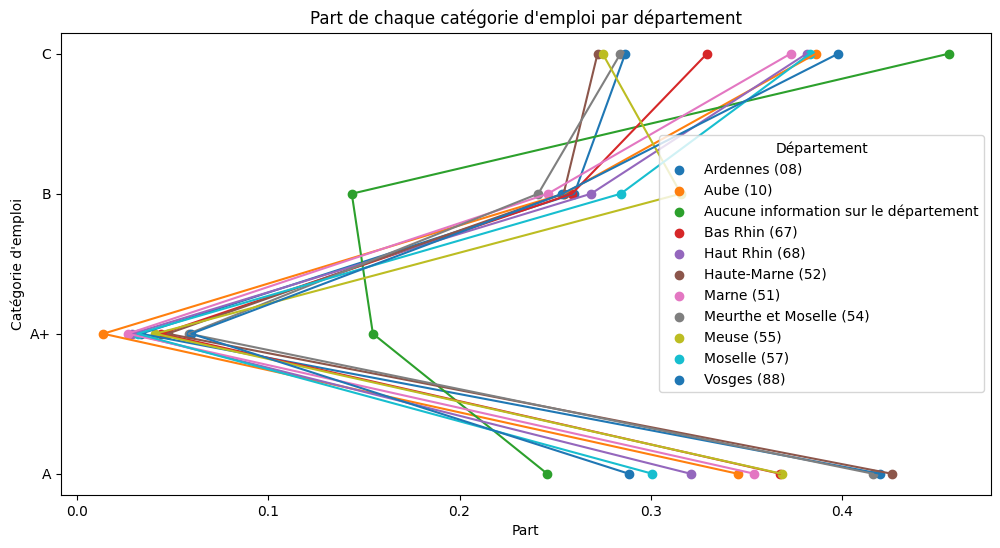

In [144]:
plt.figure(figsize=(12, 6))
for cat in cat_dep.index:
    cat_data = cat_dep.loc[cat]
    plt.scatter(cat_data.values, cat_data.index, label=cat)
    plt.plot(cat_data.values, cat_data.index)

plt.title('Part de chaque catégorie d\'emploi par département')
plt.xlabel('Part')
plt.ylabel('Catégorie d\'emploi')
plt.legend(title='Département')
plt.show()

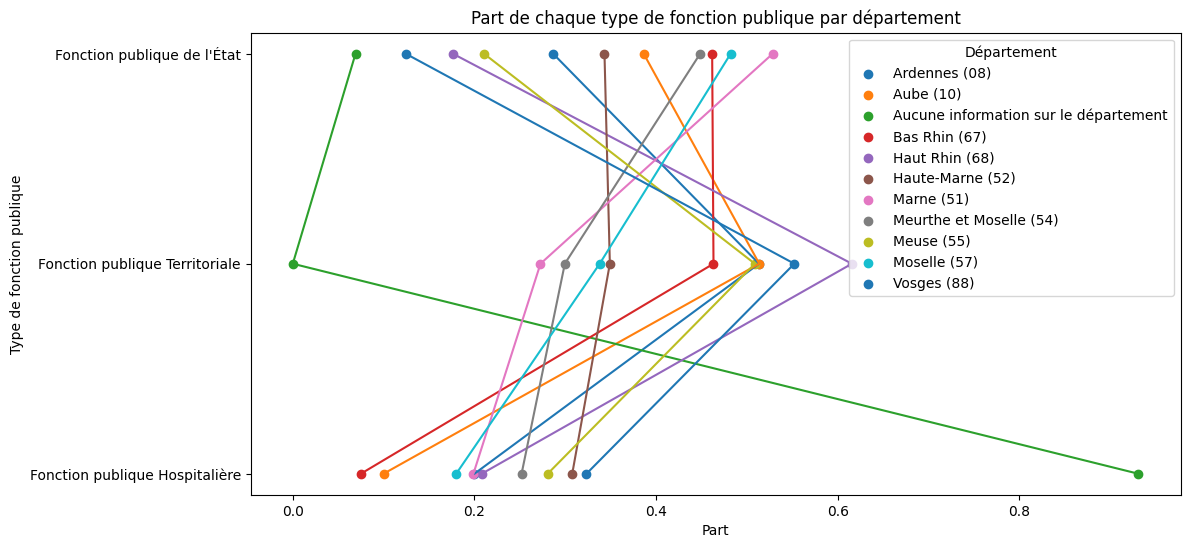

In [145]:
plt.figure(figsize=(12, 6))
for type in type_dep.index:
    type_data = type_dep.loc[type]
    plt.scatter(type_data.values, type_data.index, label=type)
    plt.plot(type_data.values, type_data.index)

plt.title('Part de chaque type de fonction publique par département')
plt.xlabel('Part')
plt.ylabel('Type de fonction publique')
plt.legend(title='Département')
plt.show()

Contre toute attente, l'analyse de la répartition sectorielle dans la région du Grand Est révèle un équilibre remarquable entre les différentes catégories, et les types de fonction publique. Cette observation contredit l'hypothèse d'une "macrocéphalie strasbourgeoise", c'est-à-dire une concentration excessive des activités et des services autour de Strasbourg au détriment des autres zones de la région.

## Test du khi-deux

Le test du \(\chi^2\) permet (entre autres) de tester l'**indépendance** entre deux variables \(X\) et \(Y\) qualitatives.

Une variable **qualitative** ou catégorielle prend comme valeur possible un ensemble fini de modalités.

Par **indépendance**, on veut dire que le fait d’appartenir à une modalité de variable \(X\) n’a pas d’influence sur la modalité d’appartenance de la varia\(Y\)Y\).le
.

In [148]:
from scipy.stats import chi2_contingency

In [160]:
chi2_categorie, p_categorie, _, _ = chi2_contingency(cat_count)

In [162]:
chi2_type, p_type, _, _ = chi2_contingency(type_count)

In [163]:
chi2_categorie, p_categorie, chi2_type, p_type

(194.65741349074804,
 4.9231119368489325e-26,
 1319.6487628319387,
 1.832144285683202e-267)

Ces résultats suggèrent fortement l'existence de corrélations significatives entre les variables analysées. Dans les deux cas, les p-valeurs sont faibles, ce qui signifie que les distributions des catégories d'emploi et des types de fonction ne sont pas indépendantes des départements. 
Cela indique que certaines catégories d'emploi ou types de fonction sont plus fréquents dans certains départements par rapport à d'autres. 

## Regression logistique

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Modèle de régression logistique permettant de prédire la catégorie de l'emploi ou le type de fonction en fonction du département

Le modèle Logit correspond à la loi logistique, introduite spécialement pour ce type de modèle, de fonction de répartition Λ :

$$
F(X_i \theta) = \Lambda(X_i \theta) = \frac{e^{X_i'\theta}}{1 + e^{X_i'\theta}} = \frac{1}{1 + e^{-X_i'\theta}},
$$

la densité correspondante, usuellement notée $\lambda$, est :

$$
f(X_i \theta) = \lambda(X_i \theta) = \frac{e^{-X_i'\theta}}{(1 + e^{-X_i'\theta})^2} = \Lambda(X_i \theta)(1 - \Lambda(X_i \theta)).
$$

### Catégorie et département

In [184]:
#Encodage
label_encoder = LabelEncoder()
encoded_dep = label_encoder.fit_transform(df_GrandEst['code'])
encoded_cat = label_encoder.fit_transform(df_GrandEst['Categorie'])

In [185]:
X = encoded_dep.reshape(-1, 1)  # Variable explicative
y = encoded_cat  # Variable à prédire

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [187]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [191]:
y_pred = model.predict(X_test)

In [193]:
resultat_logit = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0)
print(resultat_logit)

              precision    recall  f1-score   support

           A       0.42      0.45      0.43       302
          A+       0.00      0.00      0.00        42
           B       0.00      0.00      0.00       200
           C       0.38      0.66      0.48       298

    accuracy                           0.39       842
   macro avg       0.20      0.28      0.23       842
weighted avg       0.28      0.39      0.33       842



Le modèle en question présente certaines contraintes, notamment en ce qui concerne les prédictions pour les catégories professionnelles A+ et B. D'un côté, la faiblesse potentielle de l'échantillon pour la catégorie A+ pourrait expliquer les limites de précision du modèle dans cette catégorie. D'un autre côté, pour la catégorie B, l'absence de raisons évidentes rend la compréhension des difficultés de prédiction plus complexe. Toutefois, il est à noter que le modèle réussit à prédire correctement les catégories A et C, bien que son efficacité globale ne soit pas particulièrement élevée.

### Type de fonction et département

In [195]:
encoded_type = label_encoder.fit_transform(df_GrandEst['type'])
y = encoded_type  # Variable à prédire

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [197]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [198]:
y_pred = model.predict(X_test)

In [199]:
resultat_logit = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0)
print(resultat_logit)

                                precision    recall  f1-score   support

Fonction publique Hospitalière       0.63      0.40      0.49       231
Fonction publique Territoriale       0.42      0.50      0.46       311
   Fonction publique de l'État       0.39      0.43      0.41       300

                      accuracy                           0.45       842
                     macro avg       0.48      0.44      0.45       842
                  weighted avg       0.47      0.45      0.45       842



Le modèle réussit à prédire correctement les types, bien que son efficacité globale ne soit pas particulièrement élevée.

### FUN Prédiction des départements en fonction de la cat et du type

Dans le cadre de notre étude, nous sommes confrontés à une situation où un nombre significatif de données relatives aux départements sont censurées, c'est-à-dire qu'un certain nombre d'offres d'emploi sont dépourvues d'information géographique spécifique. Pour pallier ce manque et prédire le département sur la base de variables telles que la catégorie professionnelle et le type de fonction publique, il est nécessaire de recourir à une méthode adaptée. Traditionnellement en économie, les modèles Tobit sont utilisés pour gérer les données censurées, mais leur applicabilité est limitée dans ce contexte en raison de la nature spécifique des données. Par conséquent, nous nous orientons vers une méthode alternative, celle de l'apprentissage par arbres de décision (Decision tree learning). Cette approche permet une modélisation flexible et intuitive, adaptée aux caractéristiques particulières des données en question, et offre la capacité de traiter efficacement des données censurées ou incomplètes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
df_GrandEst2 = pd.read_csv('S:/Desktop/Python/data_GrandEstv2.csv')

In [262]:
predict = ['type', 'Categorie']

In [278]:
for col in predict:
    label_encoder = LabelEncoder()
    df_GrandEst2[col] = label_encoder.fit_transform(df_GrandEst2[col])

In [279]:
# Séparation des données en ensemble avec et sans 'code'
data_avec_dep = df_GrandEst2.dropna(subset=['code'])
data_sans_dep = df_GrandEst2[df_GrandEst2['code'].isna()]

# Préparation des ensembles pour l'entraînement du modèle et la prédiction
X_train = data_avec_dep[predict]
y_train = data_avec_dep['code']
X_predict = data_sans_dep[predict]

In [280]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [281]:
predicted_dep = model_new.predict(X_predict)

In [282]:
data_sans_dep.loc[:, 'code'] = predicted_dep

In [283]:
df_GrandEst_predict = pd.concat([data_avec_dep, data_sans_dep])

In [303]:
dico = {
    57.0: "Moselle (57)",
    10.0: "Aube (10)",
    68.0: "Haut Rhin (68)",
    51.0: "Marne (51)",
    67.0: "Bas Rhin (67)",
    54.0: "Meurthe et Moselle (54)",
    55.0: "Meuse (55)",
    52.0: "Haute-Marne (52)",
    88.0: "Vosges (88)",
    8.0: "Ardennes (08)"
}


In [304]:
# Utilisation du dictionnaire pour mapper les codes aux noms de département
df_GrandEst_predict['departement_nom'] = df_GrandEst_predict['code'].map(dico)

df_GrandEst_predict['departement'] = df_GrandEst_predict['departement_nom']
del df_GrandEst_predict['departement_nom'] 

In [306]:
nb_offre_dep_predict = df_GrandEst_predict['departement'].value_counts()
nb_offre_dep_predict = nb_offre_dep_predict.sort_values()

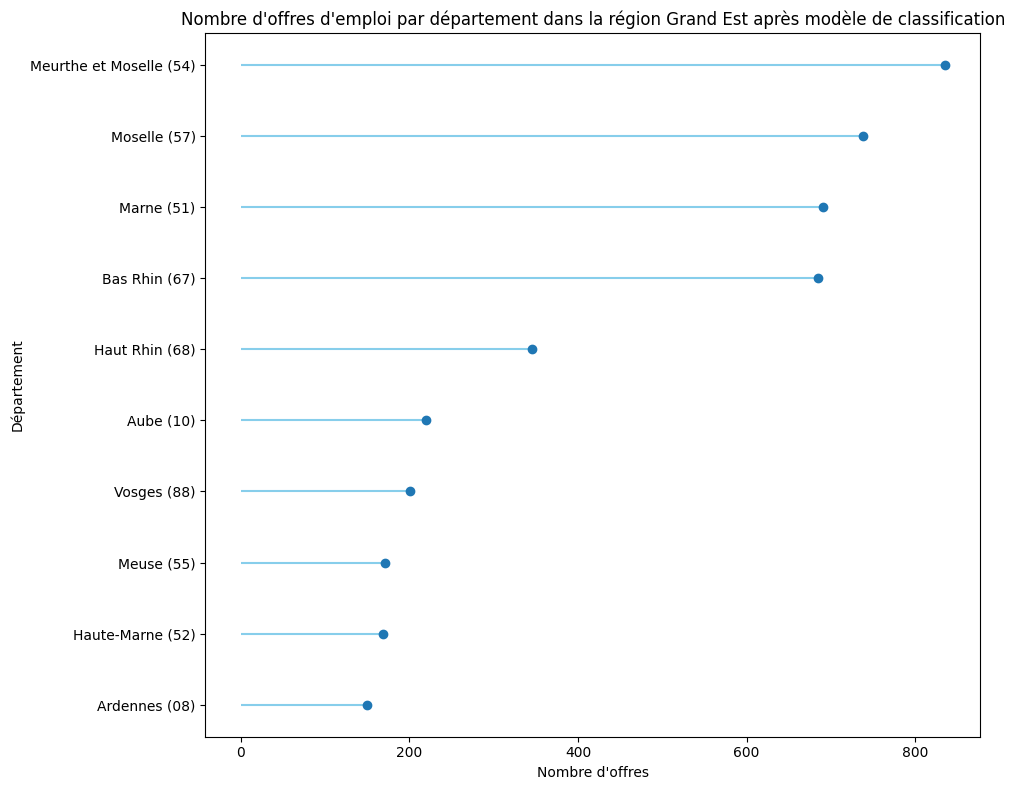

In [308]:
plt.figure(figsize=(10, 8))
plt.hlines(y=nb_offre_dep_predict.index, xmin=0, xmax=nb_offre_dep_predict, color='skyblue')
plt.plot(nb_offre_dep_predict, nb_offre_dep_predict.index, "o")
plt.title('Nombre d\'offres d\'emploi par département dans la région Grand Est après modèle de classification')
plt.xlabel('Nombre d\'offres')
plt.ylabel('Département')
plt.tight_layout()

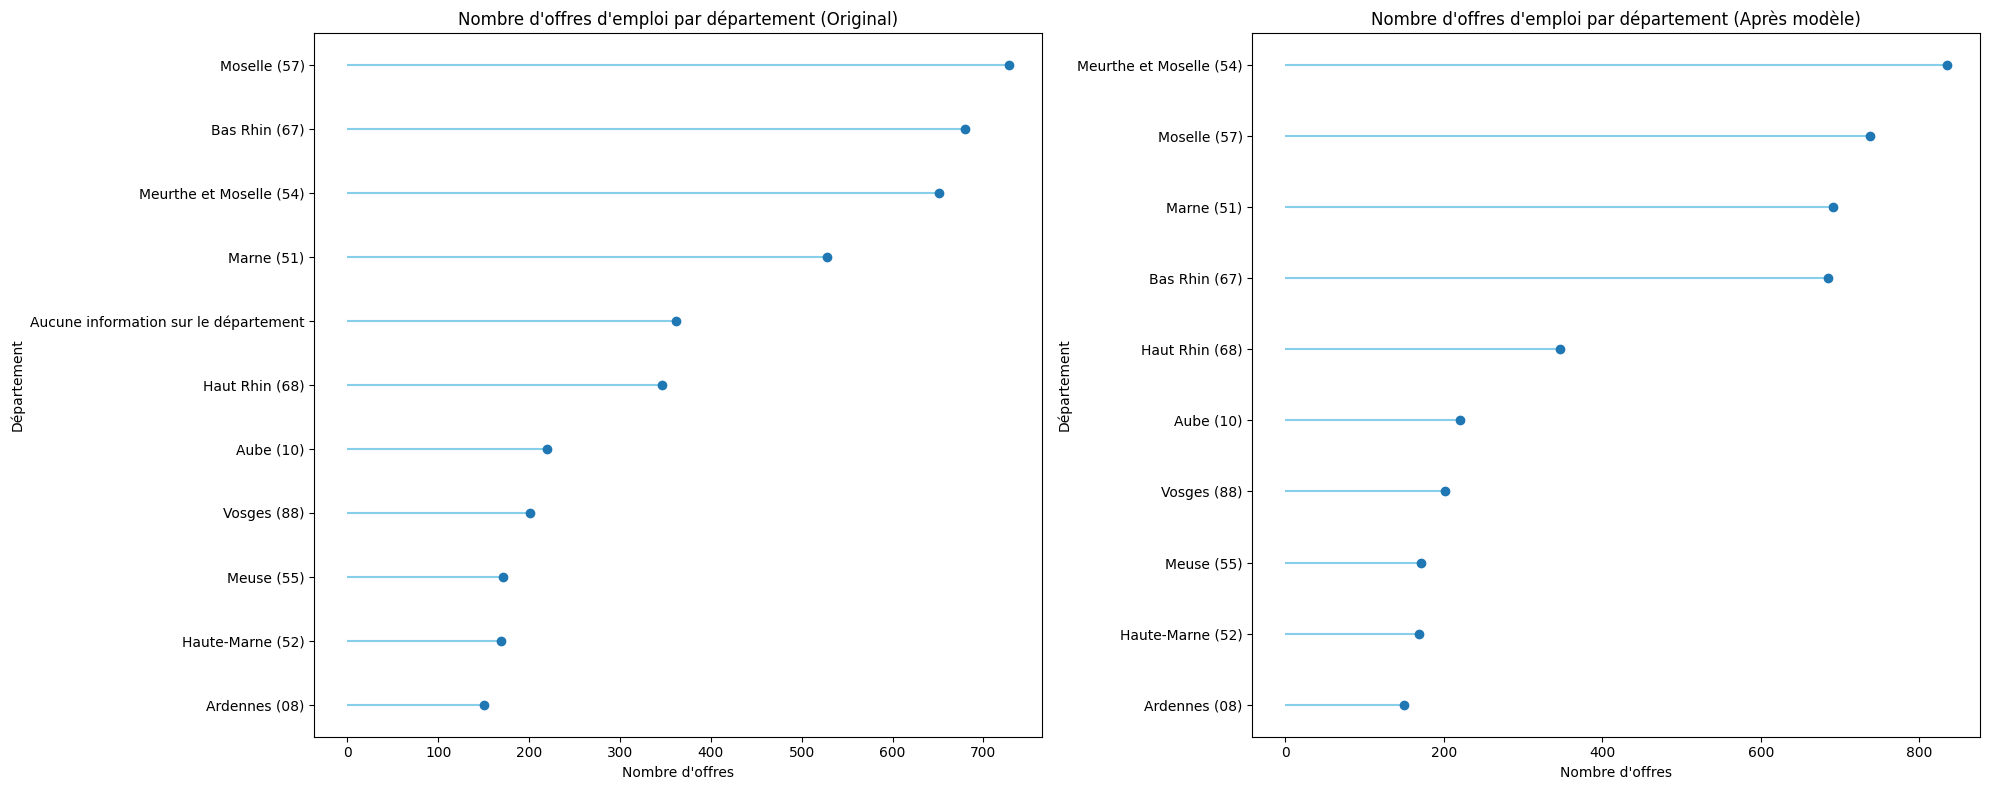

In [310]:
#Comparaison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].hlines(y=nb_offre_dep.index, xmin=0, xmax=nb_offre_dep, color='skyblue')
axes[0].plot(nb_offre_dep, nb_offre_dep.index, "o")
axes[0].set_title('Nombre d\'offres d\'emploi par département (Original)')
axes[0].set_xlabel('Nombre d\'offres')
axes[0].set_ylabel('Département')

axes[1].hlines(y=nb_offre_dep_predict.index, xmin=0, xmax=nb_offre_dep_predict, color='skyblue')
axes[1].plot(nb_offre_dep_predict, nb_offre_dep_predict.index, "o")
axes[1].set_title('Nombre d\'offres d\'emploi par département (Après modèle)')
axes[1].set_xlabel('Nombre d\'offres')
axes[1].set_ylabel('Département')

plt.tight_layout()
plt.show()

## Offre d'emploi et temps : catéogie et type de fonction 

In [316]:
import datetime

In [319]:
aujourdhui = datetime.datetime.now()

In [333]:
#On converti en date
df_GrandEst['date'] = pd.to_datetime(df_GrandEst['date'])

In [334]:
df_GrandEst['age_offre'] = (aujourdhui - df_GrandEst['date']).dt.days

In [335]:
Stats_cat = df_GrandEst.groupby('Categorie')['age_offre'].agg(['mean', 'median', 'max'])
Stats_type = df_GrandEst.groupby('type')['age_offre'].agg(['mean', 'median', 'max'])

In [336]:
Stats_cat, Stats_type

(                 mean  median  max
 Categorie                         
 A          134.932831    52.0  732
 A+         177.199029   107.0  605
 B          117.227788    48.0  691
 C          122.857047    41.0  732,
                                       mean  median  max
 type                                                   
 Fonction publique Hospitalière  280.643454   241.0  732
 Fonction publique Territoriale   22.508333    18.0  305
 Fonction publique de l'État     128.889739    97.0  703)

L'analyse des données de notre base révèle que les offres d'emploi de la catégorie A+ ainsi que celles relevant de la fonction publique hospitalière sont les plus anciennes. Cette observation s'inscrit dans un contexte plus large de crise affectant la fonction publique hospitalière et les postes de catégorie A+, tels que les professeurs. Cette situation peut refléter des difficultés dans le recrutement ou la rétention de personnels hautement qualifiés dans ces secteurs, possiblement dues à des facteurs tels que des conditions de travail difficiles, un manque de reconnaissance ou des enjeux salariaux. Cette tendance met en lumière des défis structurels au sein de la fonction publique, notamment dans le domaine hospitalier, nécessitant une attention et des mesures adaptées pour améliorer l'attractivité et la gestion des ressources humaines dans ces secteurs clés.

## FUN Regression linéaire

Nous tentons d'examiner le lien existant entre l'âge des annonces d'emploi, une variable continue, et les catégories de postes ou les différents types de fonction publique, des variables catégorielles. Pour ce faire, nous utilisons une méthode de régression linéaire associée à un codage one-hot.


In [358]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [347]:
df_GrandEst_selected = df_GrandEst[['age_offre', 'Categorie', 'type']]

In [350]:
df_GrandEst_encoded = pd.get_dummies(df_GrandEst_selected, columns=['Categorie', 'type'])

In [351]:
X = df_GrandEst_encoded.drop('age_offre', axis=1)
y = df_GrandEst_encoded['age_offre']

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [363]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [365]:
y_pred = model.predict(X_train)

In [366]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [367]:
print("Coefficients du modèle :", model.coef_)
print("Erreur quadratique moyenne sur le jeu de test :", mse)
print(f"R^2 Score: {r2}")

Coefficients du modèle : [9.95177167e+14 9.95177167e+14 9.95177167e+14 9.95177167e+14
 2.56868319e+15 2.56868319e+15 2.56868319e+15]
Erreur quadratique moyenne sur le jeu de test : 16601.020734244947
R^2 Score: 0.3898918867983294


Il semblerait que le modèle en question soit confronté à des difficultés liées à des coefficients anormalement élevés, accompagnés d'un R^2 peu convaincant. Ces problématiques pourraient être attribuées à des phénomènes de multicollinéarité et de problèmes d'échelle dans les données.